In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M...",NaN,NaN,NaN
3535,ham,Oic cos me n my sis got no lunch today my dad ...,NaN,NaN,NaN
482,ham,Watching tv lor...,NaN,NaN,NaN
582,spam,We tried to contact you re your reply to our o...,NaN,NaN,NaN
2622,ham,Ok lor...,NaN,NaN,NaN


In [27]:
#Check Shape (# of Rows and Columns in DataFrame)
df.shape

(5572, 5)

## Steps:

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [29]:
#Check Missing (NaN) Values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [30]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [31]:
df.sample(5)

,v1,v2
2062,ham,Is there any training tomorrow?
631,ham,Thank u!
1093,ham,Well the weather in cali's great. But its comp...
1659,ham,"Yeah, where's your class at?"
2957,spam,U have a secret admirer. REVEAL who thinks U R...


In [32]:
# renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
723,ham,Ya even those cookies have jelly on them
3040,ham,Aight what time you want me to come up?
2709,ham,Sorry de i went to shop.
1680,ham,Okay... We wait ah
3019,ham,I thank you so much for all you do with selfle...


In [33]:
#LabelEncoder can be used to normalize labels. 
#It can be used to transform non-numerical labels (Ham, Spam) to numerical labels
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.sample(5)

,target,text
757,0,"Faith makes things possible,Hope makes things ..."
4474,0,We will meet soon princess! Ttyl!
1597,1,URGENT! Your Mobile number has been awarded wi...
2418,0,"Madam,regret disturbance.might receive a refer..."
3320,0,Yo im right by yo work


In [34]:
df['target'].sum()

747

In [35]:
#check missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [36]:
# check for duplicate valus
df.duplicated().sum()

403

In [37]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [38]:
# check for duplicate values
df.duplicated().sum()

0

In [39]:
df.shape

(5169, 2)

In [40]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA (Expodatary Data Analysis)

In [41]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

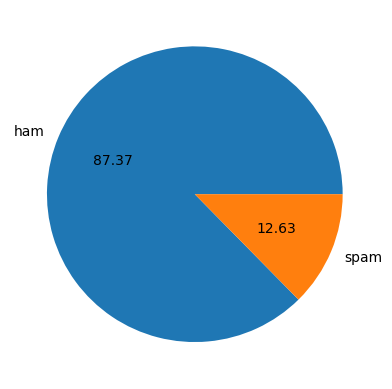

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=('ham', 'spam'), autopct="%0.2f");#autopct used to label the wedges with their numeric value.
plt.show();

# Observation:
## 1 -Data is imbalanced

In [44]:
#!pip install nltk
import nltk

In [17]:
nltk.download('punkt') #Punkt tokenizer divides a text into a list of wrod or sentences

[nltk_data] Downloading package punkt to C:\Users\Sajid
[nltk_data]     Mehar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# number of words
df['num_of_charactors'] = df['text'].apply(len)
df.head()

,target,text,num_of_charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
# number of words
df['num_of_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))
df.head()

,target,text,num_of_charactors,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
# number of sentance
df['num_of_sent'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
# ham
df[df['target'] == 0][['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# sham
df[df['target'] == 1][['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_charactors', ylabel='Count'>

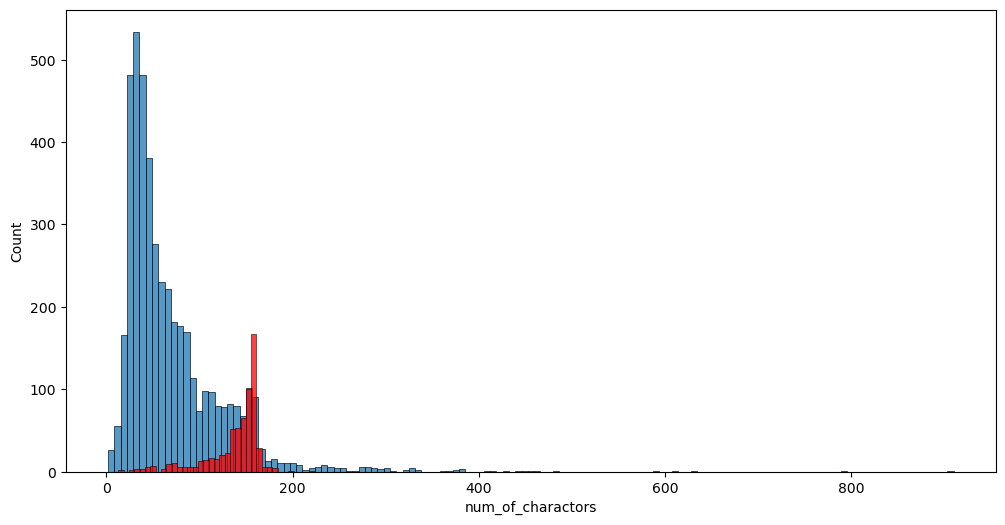

In [53]:
#Plot histograms for num of charactors
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_charactors'])
sns.histplot(df[df['target'] == 1]['num_of_charactors'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

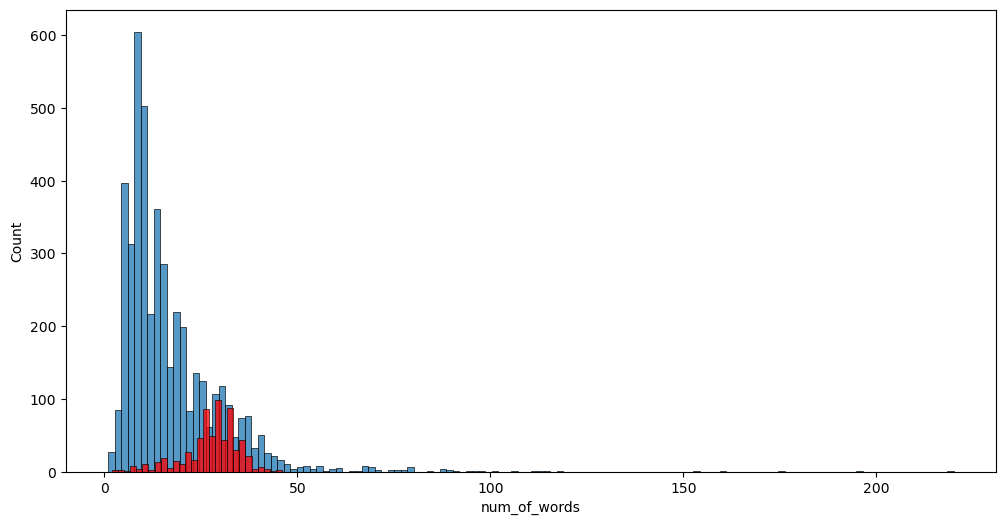

In [54]:
#Plot histograms for num of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'], color='red')


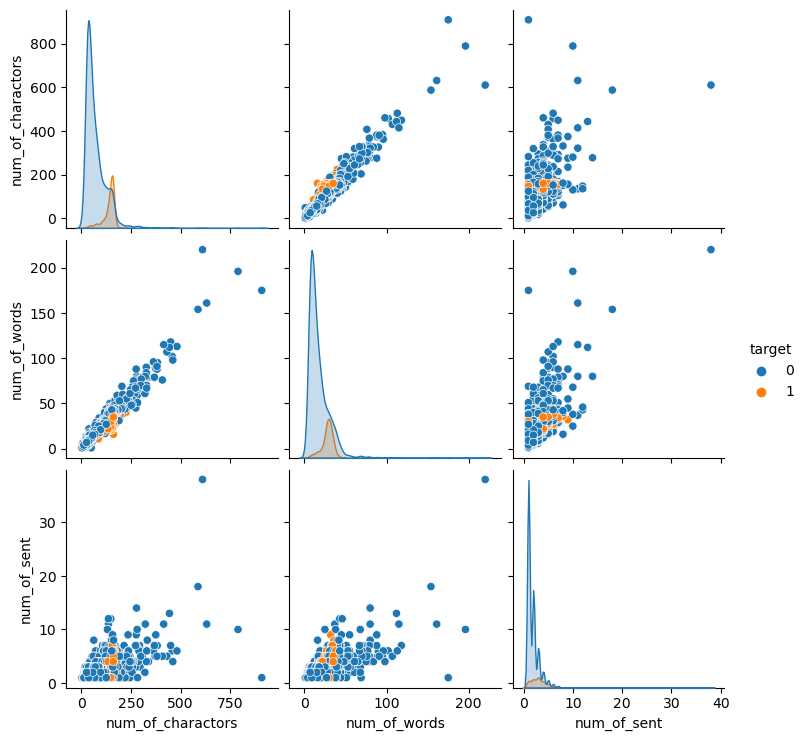

In [55]:
#Plot pairwise relationships between variables within a dataset
sns.pairplot(df,hue='target');

C:\Users\Sajid Mehar\AppData\Local\Temp\ipykernel_9824\3240728658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


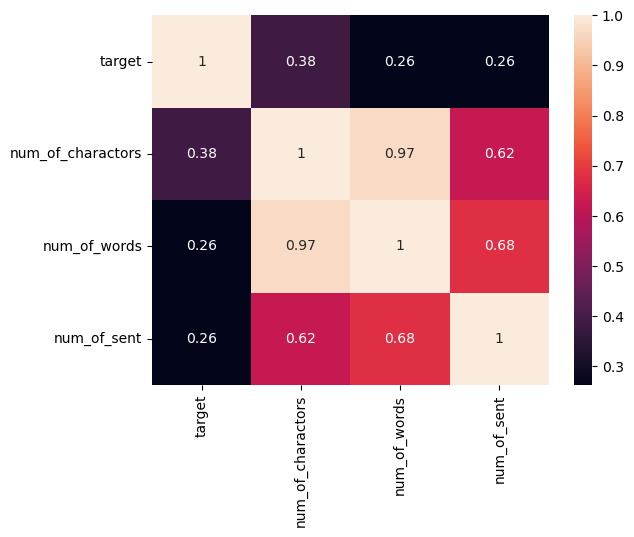

In [72]:
#Plot heatmap color-coded correlation matrix
sns.heatmap(df.corr(), annot=True);

# 3. Data Preprocessing
## Lower case
## Tokenization
## Removing special characters
## Removing stop words and punctuation
## Stemming

In [56]:
#Punctuation
import string  
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
#English Stop Words
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Sajid
[nltk_data]     Mehar\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [59]:
#Create a Function for perfoma all Data Preprocessing Stps
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #Retrun a list of all words 
    
    t = []
    for i in text:
        if i.isalnum():
            t.append(i)
    
    text = t[:] #Save Current Values of t into text
    t.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            t.append(i)
    

    text = t[:] #Save Current Values of t into text
    t.clear()
    
    for i in text:
        t.append(ps.stem(i))
    
    return " ".join(t)               

In [60]:
df['transformed_text'] = df['text'].apply(transform_text)

In [61]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
#!pip install wordcloud
#Draw Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

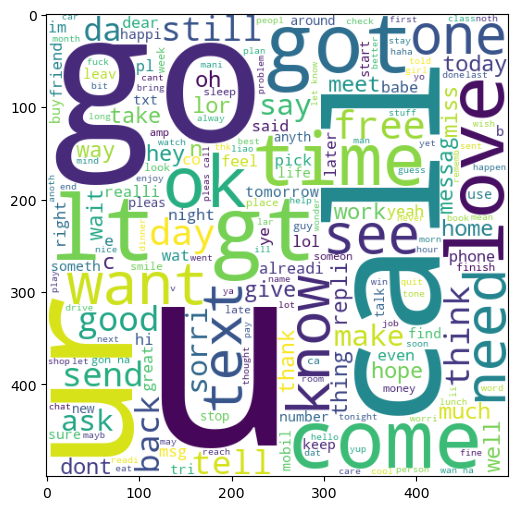

In [117]:
#Complate DataFrame Word cloud
df_wc = wc.generate(df['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(df_wc);

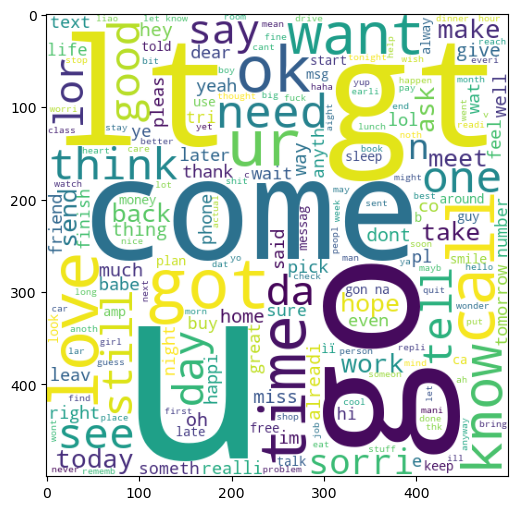

In [121]:
#Word cloud of only Ham (0) Massages
ham_wc =wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep =' '))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc);

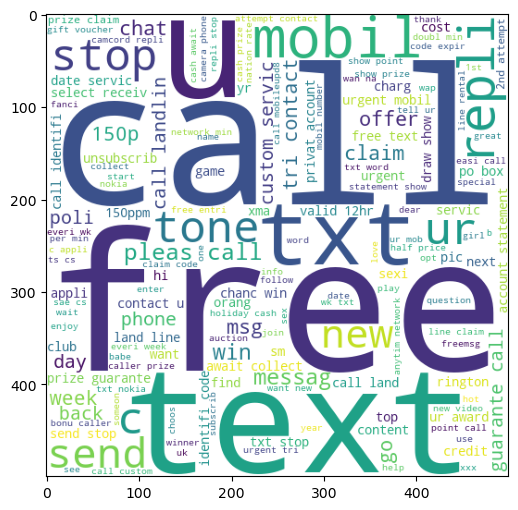

In [123]:
#Word cloud of only Spam (1) Massages
spam_wc =wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep =' '))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc);

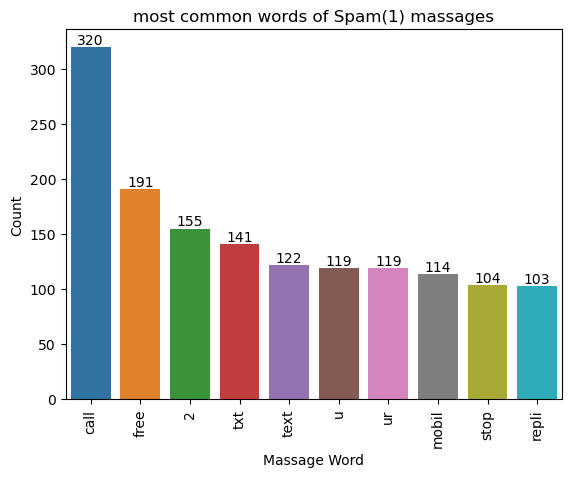

In [220]:
#Count the frequance of words and filter most common words of spam(1) massages 
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
from collections import Counter
ax = sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(10))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
ax.bar_label(ax.containers[0]) # show valus on bars
plt.xticks(rotation = 'vertical')
plt.title("most common words of Spam(1) massages")
plt.xlabel('Massage Word') 
plt.ylabel('Count')
plt.show()

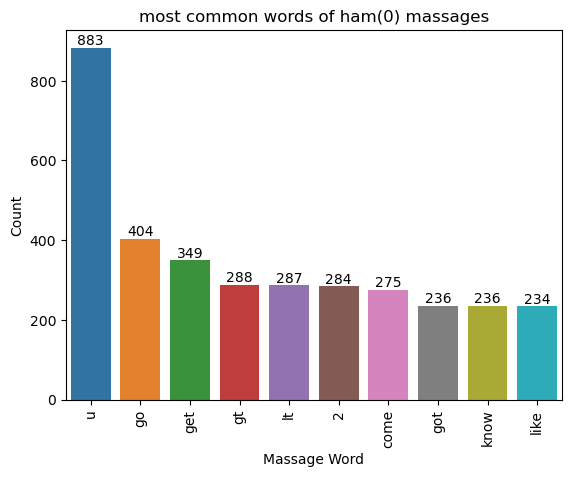

In [217]:
#Count the frequance of words and filter most common words of ham(0) massages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)
ax = sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(10))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(10))[1])
ax.bar_label(ax.containers[0]) # show valus on bars
plt.xticks(rotation = 'vertical')
plt.title("most common words of ham(0) massages")
plt.xlabel('Massage Word') 
plt.ylabel('Count')
plt.show();

In [212]:
#Reload matplotlib for run missing features 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

# 4. Model Building


In [218]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Let's try CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [63]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y=df['target'].values

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# import naive_bayes models  GaussianNB, MultinomialNB, BernoulliNB

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
#accuracy_score = measures the number of correct predictions made by a model in relation to the total number of predictions made
#confusion_matrix =  confusion matrix is a table that is used to define the performance of a classification algorithm
#precision_score = measures how well a classifier predicts the positive class
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [252]:
#Fit the GaussianNB model 
gnb.fit(X_train, y_train)
print(f"gnb score: {gnb.score(X_test, y_test)}")
y_predic1 = gnb.predict(X_test)
print(f"Accuracy Score gnb: {accuracy_score(y_test, y_predic1)}")
print(f"Confusion Matrix gnb: {confusion_matrix(y_test, y_predic1)}")
print(f"Precision Score gnb: {precision_score(y_test, y_predic1)}")    

gnb score: 0.8558994197292069
Accuracy Score gnb: 0.8558994197292069
Confusion Matrix gnb: [[763 129]
 [ 20 122]]
Precision Score gnb: 0.4860557768924303


In [68]:
#Fit the MultinomialNB model 
mnb.fit(X_train, y_train)
print(f"mnb score: {mnb.score(X_test, y_test)}")
y_predic2 = mnb.predict(X_test)
print(f"Accuracy Score mnb: {accuracy_score(y_test, y_predic2)}")
print(f"Confusion Matrix mnb: {confusion_matrix(y_test, y_predic2)}")
print(f"Precision Score mnb: {precision_score(y_test, y_predic2)}")    

mnb score: 0.9680851063829787
Accuracy Score mnb: 0.9680851063829787
Confusion Matrix mnb: [[876  19]
 [ 14 125]]
Precision Score mnb: 0.8680555555555556


In [69]:
#Fit the BernoulliNB model 
bnb.fit(X_train, y_train)
print(f"bnb score: {bnb.score(X_test, y_test)}")
y_predic3 = bnb.predict(X_test)
print(f"Accuracy Score bnb: {accuracy_score(y_test, y_predic3)}")
print(f"Confusion Matrix bnb: {confusion_matrix(y_test, y_predic3)}")
print(f"Precision Score bnb: {precision_score(y_test, y_predic3)}")  

bnb score: 0.971953578336557
Accuracy Score bnb: 0.971953578336557
Confusion Matrix bnb: [[891   4]
 [ 25 114]]
Precision Score bnb: 0.9661016949152542


# model improve
# 1. Change the max_features parameter of TfIdf

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)

In [71]:
X=tfid.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [72]:
gnb_tfid = GaussianNB()
mnb_tfid = MultinomialNB()
bnb_tfid = BernoulliNB()

In [73]:
#Fit the GaussianNB model on Tfid
gnb_tfid.fit(X_train, y_train)
print(f"gnb_tfid score: {gnb_tfid.score(X_test, y_test)}")
y_predic1 = gnb_tfid.predict(X_test)
print(f"Accuracy Score gnb_tfid: {accuracy_score(y_test, y_predic1)}")
print(f"Confusion Matrix gnb_tfid: {confusion_matrix(y_test, y_predic1)}")
print(f"Precision Score gnb_tfid: {precision_score(y_test, y_predic1)}")    

gnb_tfid score: 0.8665377176015474
Accuracy Score gnb_tfid: 0.8665377176015474
Confusion Matrix gnb_tfid: [[779 120]
 [ 18 117]]
Precision Score gnb_tfid: 0.4936708860759494


In [74]:
#Fit the MultinomialNB model on Tfid
mnb_tfid.fit(X_train, y_train)
print(f"mnb_tfid score: {mnb_tfid.score(X_test, y_test)}")
y_predic2 = mnb_tfid.predict(X_test)
print(f"Accuracy Score mnb_tfid: {accuracy_score(y_test, y_predic2)}")
print(f"Confusion Matrix mnb_tfid: {confusion_matrix(y_test, y_predic2)}")
print(f"Precision Score mnb_tfid: {precision_score(y_test, y_predic2)}")  

mnb_tfid score: 0.9758220502901354
Accuracy Score mnb_tfid: 0.9758220502901354
Confusion Matrix mnb_tfid: [[898   1]
 [ 24 111]]
Precision Score mnb_tfid: 0.9910714285714286


In [75]:
#Fit the BernoulliNB model on Tfit 
bnb_tfid.fit(X_train, y_train)
print(f"bnb_tfid score: {bnb_tfid.score(X_test, y_test)}")
y_predic3 = bnb_tfid.predict(X_test)
print(f"Accuracy Score bnb_tfid: {accuracy_score(y_test, y_predic3)}")
print(f"Confusion Matrix bnb_tfid: {confusion_matrix(y_test, y_predic3)}")
print(f"Precision Score bnb_tfid: {precision_score(y_test, y_predic3)}")  

bnb_tfid score: 0.9806576402321083
Accuracy Score bnb_tfid: 0.9806576402321083
Confusion Matrix bnb_tfid: [[896   3]
 [ 17 118]]
Precision Score bnb_tfid: 0.9752066115702479


# Select model : tfidf --> mnb_tfid

## --> Try some other MOdels

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [266]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [267]:
#Create Dictinory of Clfs
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [289]:
# Function for Calculate accuracy,precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_predic = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predic)
    precision = precision_score(y_test, y_predic)
    
    return accuracy, precision      


In [290]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9747899159663865)

In [294]:
accuracy_scores_list = []
precision_scores_list = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores_list.append(current_accuracy)    
    precision_scores_list.append(current_precision)

For SVC
Accuracy - 0.9738878143133463
Precision - 0.9747899159663865
For KN
Accuracy - 0.9110251450676983
Precision - 1.0
For NB
Accuracy - 0.9738878143133463
Precision - 1.0
For DT
Accuracy - 0.9342359767891683
Precision - 0.8050847457627118
For LR
Accuracy - 0.9516441005802708
Precision - 0.9326923076923077
For RF
Accuracy - 0.9690522243713733
Precision - 0.990909090909091
For AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9024390243902439
For BgC
Accuracy - 0.960348162475822
Precision - 0.8666666666666667
For ETC
Accuracy - 0.9758220502901354
Precision - 0.9831932773109243
For GBDT
Accuracy - 0.9477756286266924
Precision - 0.93


# Creatig Data Frame

In [295]:
performace_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores_list, 'Precision ':precision_scores_list})

In [296]:
performace_df

,Algorithm,Accuracy,Precision
0,SVC,0.973888,0.974790
1,KN,0.911025,1.000000
2,NB,0.973888,1.000000
3,DT,0.934236,0.805085
4,LR,0.951644,0.932692
5,RF,0.969052,0.990909
6,AdaBoost,0.960348,0.902439
7,BgC,0.960348,0.866667
8,ETC,0.975822,0.983193
9,GBDT,0.947776,0.930000


In [298]:
performance_df1 = pd.melt(performace_df, id_vars = "Algorithm")

In [299]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.973888
1,KN,Accuracy,0.911025
2,NB,Accuracy,0.973888
3,DT,Accuracy,0.934236
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.969052
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.960348
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.947776


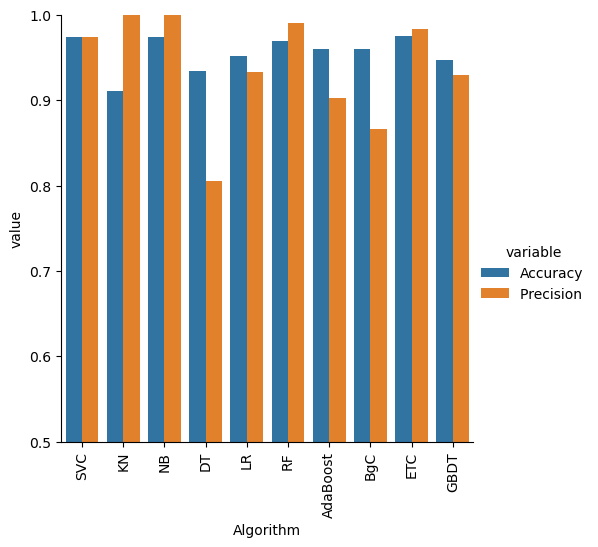

In [301]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [302]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [303]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 1.0


In [76]:
import pickle 
pickle.dump(tfid,open('tfid_Vactorizer.pkl', 'wb'))
pickle.dump(mnb_tfid,open('mnb_tfid.pkl', 'wb'))
